# Explanatory Analysis of National Health and Nutrition Examination Survey (NHANES) data



#### Brief Introduction

    In this project, the  aim is to show ways to go deep into the data story-telling even though the dataset is small.  Nevertheless, we must go deeply into what factors influenced the obesity of a specific subject. In order to do this we must look for patterns in our data analysis and gain extensive insight of what the data is telling us. Lastly, we will go step by step to understand the story behind the subjects in this dataset.



#### Table of Contents:

* I. ImportingLibraries
* II. Data preprocessing
      a) data cleaning
* II. Distribution of BMI 
* III. Age Analysis 
        a) Turning Age into Categorical Variables
        b) Is there a relationship between BMI and Age
* IV. Obesity Status and obesity class 
        a) Looking for relationships between obesity and other variables
* IV.Stratified analysis with categorical variables
        a) Annual Household Income
        b) Hrs TV/Video use 

 

<a id='ImportingLibraries'></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
from pandas import ExcelWriter


### Shape of data

In [2]:

df = pd.read_excel('obesity_analysis.xlsx')
df.head()

#df.head()
df.dropna()
print('Observations: ' + str(df.shape[0]))
print('Features: ' + str(df.shape[1]))

Observations: 1612
Features: 12


## 2. Data Preprocessing

    In setting the environment for data analysis, there is a need to examine our variables: what they encompass and the extent of  data cleaning  processes to run an optimal,empirical analysis and extensive analysis . Firstly, a  univariate analysis is significant in establishing the shape and variance of each variable and will thus advise the data cleaning process. Consequently, a stratified analysis will follow.



    
#### Data cleaning:

    The objective here is to analyze each data variable and visualizing the same in one dimension. The type of variable whether: categorical, discrete or continuous will influence the type of visualisation implemented.
    
    Second objective is to determine an optimal  clean up process for each variable: Cleaning up may involve the following:
    
- Dropping N/A values
- Replacing numerical categorical values with their nominal descriptive values for easier recognition in data visualization.
- Creating new variables  based on combination  of already existent categorical variables.



#### The attributes prior to preprocessing

 - ID 
 - Gender
 - Age
 - Smoke Status
 - Race
 - BMI
 - BMI status
 - Eating Out Spenditure
 - Hrs TV/Video use: Hours spent per day watching TV or videos past 30 days 
 - Cholestrol Level
 - Cholestrol Level SI
 - Annual household income
 
    

In [3]:
# existant attributes
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'Obesity status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income'],
      dtype='object')

#####  1. Gender

- According to https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm#RIAGENDR Gender is classified into the following categories:
    * male =1 or female =2
- For the purpose of visualization and easier interpretation of results, this variable's numerical categorical values are replaced with nominal descriptive values    

In [4]:
#Gender: male =1 or female =2
df['Gender'] = df['Gender'].replace([1, 2], ['male', 'female'], inplace=False)

#df['Gender']

##### 2. Smoke Status

- This variable has six descriptive values( https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/SMQ_H.htm#SMQ040). Three of them would not influence this particular  analysis  as they are based on missing values. Therefore , only three are used in this analysis :
    * 1=every day;  2 = some days; 3= not at all
    
- Again, for the purpose of easier interpretation of results, their discrete categorical values are replaced with their nominal descriptive values.


In [5]:
#Smoke Status: 1=every day ; 2 = some days; 3= not at all
df['Smoke Status'] = df['Smoke Status'].replace({1.0:'smokes daily', 2.0:'smokes some days', 3.0:'non smoker'})

#df['Smoke Status']

##### 3. Ethnicity

- Ethnicity is described by the following  discrete descriptive values( https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm#RIDRETH1):
- For a clear  interpretation, the categorical values were changed to reflect their nominal descriptive values:

    * 1= Mexican American;- 2= Other Hispanic;  3= Non-Hispanic White; 4= Non-Hispanic Black; 5=Other Race - Including Multi-Racial


In [6]:
df[' Ethnicity'] = df[' Ethnicity'].replace({1: 'Mexican American',
                                            2: 'Other Hispanic',
                                            3: 'Non-Hispanic White',
                                            4: 'Non-Hispanic Black',
                                            5: 'Other Race'})
df[' Ethnicity'] 

0           Other Hispanic
1       Non-Hispanic Black
2               Other Race
3       Non-Hispanic White
4       Non-Hispanic Black
               ...        
1607        Other Hispanic
1608    Non-Hispanic White
1609    Non-Hispanic Black
1610      Mexican American
1611    Non-Hispanic Black
Name:  Ethnicity, Length: 1612, dtype: object

##### 4. BMI

- Firstly, there are  59 missing values in  the BMI variable, since this variable is integral to the analysis as it defines obesity, these 59 values are dropped.The range of values of this continuous numerical variable is 12.1 to 82.9. ( https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BMX_H.htm#BMXBMI)
- Now, according to the: https://www.cdc.gov/obesity/adult/defining.html obesity is frequently subdivided into categories:
    * Class 1: BMI of 30 to < 35
    * Class 2: BMI of 35 to < 40
    * Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “extreme” or “severe” obesity.

- For this analysis the creation of another variable  with the aforementioned  categorical descriptions  could provide some insight during  the multivariate analysis. Hence, a new variable called  Obesity Status is created and defined by BMI values.



In [7]:
#dropping n/a values
df = df.dropna(subset=['BMI '])
df['BMI '] =df['BMI '].astype(int)
df['BMI ']

1       35
2       23
3       26
4       32
5       36
        ..
1607    25
1608    33
1609    23
1610    26
1611    34
Name: BMI , Length: 1553, dtype: int64

In [8]:

#function for the new 'Obesity class' conditons
def label_bmi (row):
    
    #if row['eri_hispanic'] == 1 :
   if ((row['BMI '] >=30) & (row['BMI '] < 35)):
      return 'Class 1'
   if ((row['BMI '] >=35) & (row['BMI '] < 40)):
      return 'Class 2'
   if (row['BMI '] >=40):
      return 'Class 3'   
   else:
      return 'Not obese'
df['Obesity class'] = df.apply (lambda row: label_bmi(row), axis =1)
df['Obesity class']

1         Class 2
2       Not obese
3       Not obese
4         Class 1
5         Class 2
          ...    
1607    Not obese
1608      Class 1
1609    Not obese
1610    Not obese
1611      Class 1
Name: Obesity class, Length: 1553, dtype: object

##### 5. Obesity Status

- Criteria of this variable is:
    * If BMI>= 30 then it labels 1,
    * If  BMI< 30 it labels not 0. 
- Replacing the '1' and 'O' with 'obese' and 'not obese' consequtively.

In [9]:
df['Obesity status'] = df['Obesity status'].replace([1, 0], ['obese', 'not obese'], inplace=False)

df['Obesity status'] 

1           obese
2       not obese
3       not obese
4           obese
5           obese
          ...    
1607    not obese
1608        obese
1609    not obese
1610    not obese
1611        obese
Name: Obesity status, Length: 1553, dtype: object

##### 6. Eating out Spenditure


- Eating out expenditure has values: 999999, 777777 which according to the codebook, are values of people who refused to answer and did not know. Since these values are  are extreme (values in this variable range from 0-2142) and are certainly not relevant, they are excluded.



In [10]:
df['Eating Out Spenditure']=df['Eating Out Spenditure'].replace(999999.0, np.nan)
df['Eating Out Spenditure']=df['Eating Out Spenditure'].replace(777777.0, np.nan)



/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



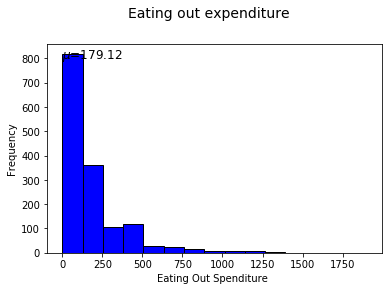

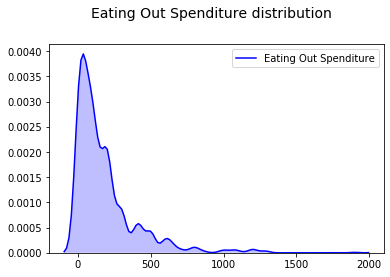

In [11]:
#df['Eating Out Spenditure'].replace(0.0, np.nan, inplace=True)
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Eating out expenditure", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Eating out expenditure")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['Eating Out Spenditure'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['Eating Out Spenditure'] , color='blue', bins=15,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Eating Out Spenditure distribution", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax.set_xlabel('Eating Out Spenditure ')
ax.set_ylabel("Frequency")
sns.kdeplot(df['Eating Out Spenditure'], ax=ax1, shade=True, color='blue')




##### 7. Hours spent watching TV/ Videos:

- The criteria for this variable is:
    * 0=  Less than 1 hour; 1 = 1 hour;  2 =2 hours;  3 = 3 hours; 4= 4 hours ; 5= 5 hours or more, or 8= {You don't/SP does not} watch TV or videos
- In this attribute, I replaced 8 with zero since they would fall under this category.



In [12]:
df[ 'Hrs TV/Video use'] = df[ 'Hrs TV/Video use'].replace({8:0})
df[ 'Hrs TV/Video use'].unique()  

array([1, 2, 5, 3, 0, 4])

##### 8. Annual household income

- Renaming of  the discrete descriptive categories to more inferential categories as listed below:
https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.htm#INDHHIN2
- The descriptive value “13: under 20,000” was  combined with the  “3.0: 10,000 to 14,999” as this is the mean descriptive value between 1.0 to 4.0.

- Descriptive value “12: 20,000 -24,999” was combined with “5.0: 20000 to 24999
- Dropped '77' and '99' that represent those who either refused and or did not know



In [13]:
df[' Annual household income'] = df[' Annual household income'].replace({1.0:'0 - 4.999K',
                                                        2.0:'5K - 9.999K',
                                                        3.0:'10K - 14.999K',
                                                        4.0:'15K - 19.999K',
                                                        5.0:'20K - 24.99K',
                                                        6.0:'25K - 34.999K',
                                                        7.0:'35K - 44.999K',
                                                        8.0:'45K - 54.999K',
                                                        9.0:'55K - 64.999K ',
                                                        10.0:'65K - 74.999K',
                                                        12.0:'20K - 24.99K',
                                                        13.0:'10K - 14.999K',
                                                        14.0:'75K - 99.999K',
                                                        15.0:'100K and over'})
df[' Annual household income']

1         20K - 24.99K
2        100K and over
3         20K - 24.99K
4        100K and over
5         20K - 24.99K
             ...      
1607     15K - 19.999K
1608     35K - 44.999K
1609     45K - 54.999K
1610    55K - 64.999K 
1611     35K - 44.999K
Name:  Annual household income, Length: 1553, dtype: object

In [14]:
#dropping '77' and '79'
df[' Annual household income'].replace(77.0, np.nan, inplace=True)
df[' Annual household income'].replace(99.0, np.nan, inplace=True)
df[' Annual household income'].replace(0.0, np.nan, inplace=True)

#### The attributes AFTER  preprocessing

 - ID 
 - Gender
 - Age
 - Smoke Status
 - Race
 - BMI
 - Obesity status
     - Obesity Class
 - Eating Out Spenditure
 - Hrs TV/Video use: Hours spent per day watching TV or videos past 30 days 
 - Cholestrol Level
 - Cholestrol Level SI
 - Annual household income

## Distribution of BMI
- Several of the subjects range from 22-30. Hence the variable is rightly skewed
- The BMI of 27 has the highest  probability  distribution.
- Implementation of logarithms here is implemented to help detect outliers

In [15]:
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'Obesity status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income',
       'Obesity class'],
      dtype='object')

In [16]:
# Determine the distribution of charge
charge_dist = df['BMI '].values
logcharge = np.log(df['BMI '])



trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="BMI Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="BMI Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('BMI Distribution','BMI Charge Distribution'),
                         print_grid=False)



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='BMI Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

### Age analysis

#### a)Turning Age into Categorical Variables

In [17]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['Age'] >= 35) & (col['Age'] <= 40), 'age_cat'] = 'young-senior Adult'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 45), 'age_cat'] = 'mid-senior Adult'
    col.loc[col['Age'] > 45, 'age_cat'] = 'senior adult'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Percentage by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

#### b) Is there a Relationship between BMI and Age

- No, BMI and age have a correlation of  0.00027
- Clearly, age in this case does not influence BMI from the box plot below as the different age categories have equal mean and median.


In [18]:
bmi = [df['BMI '].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = ff.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

iplot(fig, filename='Basic Distplot')

In [19]:
corr = df.corr()

hm = go.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist()
)


data = [hm]
layout = go.Layout(title="Correlation Heatmap")

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

In [20]:
young_adults = df['BMI '].loc[df["age_cat"] == 'young-senior Adult'].values
senior_adult = df['BMI '].loc[df["age_cat"] == 'mid-senior Adult'].values
elders = df['BMI '].loc[df["age_cat"] == 'senior adult'].values

trace0 = go.Box(
    y=young_adults,
    name = 'young-senior Adult',
    boxmean= True,
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=senior_adult,
    name = 'mid-senior Adult',
    boxmean= True,
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y=elders,
    name = 'senior adult',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)




data = [trace0, trace1, trace2]

layout = go.Layout(title="Body Mass Index <br> by Age Category", xaxis=dict(title="Age Category", titlefont=dict(size=16)),
                  yaxis=dict(title="Body Mass Index", titlefont=dict(size=16)))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

##### Body Mass Index of Smokers Status by Age Category

- Adding the smoke status variable could give a different outlook, hence further subdivided the  age category  into smokers and non smokers
    * Young_smoker : Smoker who is  within ages 35-40
    * Young_nonmoker : A nonsmoker who is  within ages 35-40
    * Mid_smoker: Smoker who is  within ages 40-45
    * Mid_nonsmoker:A nonsmoker who is  within ages 40-45
    * Senior_smoker: Smoker who is  within ages 45-50
    * Senior_nonsmoker: A nonsmoker who is  within ages 45-50



In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
'young-senior Adult', 'senior adult', 'mid-senior Adult'
young_smoker = df['BMI '].loc[(df["age_cat"] == 'young-senior Adult') & (df['Smoke Status'] == 'smokes daily')].values
mid_smoker = df['BMI '].loc[(df["age_cat"] == 'mid-senior Adult') & (df['Smoke Status'] == 'smokes daily')].values
senior_smoker = df['BMI '].loc[(df["age_cat"] == 'senior adult') & (df['Smoke Status'] == 'smokes daily')].values

# Non-Smokers
young_nonsmoker = df['BMI '].loc[(df["age_cat"] == 'young-senior Adult') & (df['Smoke Status'] == 'non smoker')].values
mid_nonsmoker = df['BMI '].loc[(df["age_cat"] == 'mid-senior Adult') & (df['Smoke Status'] == 'non smoker')].values
senior_nonsmoker = df['BMI '].loc[(df["age_cat"] == 'senior adult') & (df['Smoke Status'] == 'non smoker')].values


x_data = ['young_smoker', 'young_nonsmoker',
          'mid_smoker', 'mid_nonsmoker',
          'senior_smoker', 'senior_nonsmoker',]

y0 = young_smoker
y1 = young_nonsmoker
y2 = mid_smoker
y3 = mid_nonsmoker
y4 = senior_smoker
y5 = senior_nonsmoker

y_data = [y0,y1,y2,y3,y4,y5]

colors = ['rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)']

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Body Mass Index of Smokers Status by Age Category',
    xaxis=dict(
    title="Status",
    titlefont=dict(
    size=16)),
    yaxis=dict(
        title="Body Mass Index",
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        titlefont=dict(
        size=16)
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 243, 192)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [22]:
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'Obesity status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income',
       'Obesity class', 'age_cat'],
      dtype='object')

#### Obesity

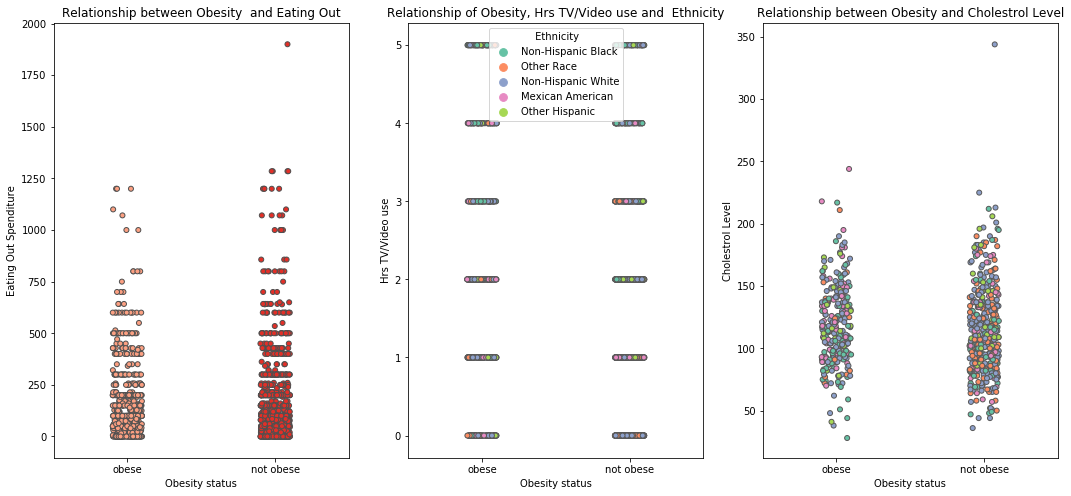

In [23]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

sns.stripplot(x='Obesity status', y='Eating Out Spenditure', data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Obesity  and Eating Out")


sns.stripplot(x='Obesity status', y='Hrs TV/Video use', hue=' Ethnicity', data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Obesity, Hrs TV/Video use and  Ethnicity")

sns.stripplot(x='Obesity status', y='Cholestrol Level', hue=' Ethnicity', data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Obesity and Cholestrol Level")

plt.show()

#### Obesity Class

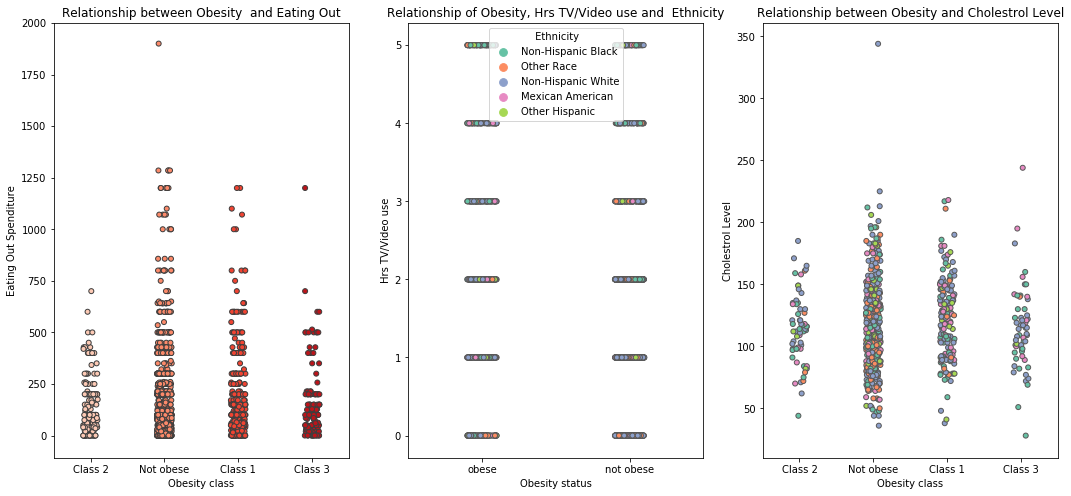

In [24]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

sns.stripplot(x='Obesity class', y='Eating Out Spenditure', data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Obesity  and Eating Out")


sns.stripplot(x='Obesity status', y='Hrs TV/Video use', hue=' Ethnicity', data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Obesity, Hrs TV/Video use and  Ethnicity")

sns.stripplot(x='Obesity class', y='Cholestrol Level', hue=' Ethnicity', data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Obesity and Cholestrol Level")

plt.show()

In [25]:
df.keys()

Index(['ID', 'Gender', 'Age', 'Smoke Status', ' Ethnicity', 'BMI ',
       'Obesity status', 'Eating Out Spenditure', 'Hrs TV/Video use',
       'Cholestrol Level', 'Cholestrol Level SI', ' Annual household income',
       'Obesity class', 'age_cat'],
      dtype='object')

In [26]:
df_income = pd.DataFrame(df, columns =[' Annual household income', 'ID','Eating Out Spenditure','BMI '])
df_income= df.groupby(' Annual household income').agg({'ID':'count','Eating Out Spenditure':'mean','BMI ':'mean','Hrs TV/Video use':'mean'}).reset_index()

df_income

,Annual household income,ID,Eating Out Spenditure,BMI,Hrs TV/Video use
0,0 - 4.999K,27,50.777778,27.444444,2.666667
1,100K and over,386,313.531915,27.292746,1.735751
2,10K - 14.999K,66,87.492308,31.045455,2.833333
3,15K - 19.999K,72,80.028169,32.375000,3.263889
4,20K - 24.99K,175,111.047337,30.000000,2.040000
5,25K - 34.999K,154,111.748344,29.370130,2.149351
6,35K - 44.999K,130,119.696000,30.123077,2.184615
7,45K - 54.999K,115,139.226087,29.886957,2.017391
8,55K - 64.999K,89,169.853933,29.179775,2.011236
9,5K - 9.999K,49,74.127660,29.530612,2.244898


In [27]:
writer = ExcelWriter('df_income.xlsx')
df_income.to_excel(writer,'df_income')
writer.save()

In [28]:
df_obesity_class = pd.DataFrame(df, columns =['Obesity class', 'ID','Eating Out Spenditure','BMI ','Hrs TV/Video use','Cholestrol Level'])
df_obesity_class= df.groupby('Obesity class').agg({'ID':'count','Eating Out Spenditure':'mean','BMI ':'mean','Hrs TV/Video use':'mean','Cholestrol Level':'mean'}).reset_index()

df_obesity_class

,Obesity class,ID,Eating Out Spenditure,BMI,Hrs TV/Video use,Cholestrol Level
0,Class 1,343,190.704819,31.591837,2.157434,122.266667
1,Class 2,156,143.364865,36.461538,2.532051,114.548387
2,Class 3,127,162.016000,46.409449,2.740157,114.175439
3,Not obese,927,183.121652,24.590076,1.860841,114.990544


In [29]:
writer = ExcelWriter('df_obesity_class.xlsx')
df_obesity_class.to_excel(writer,'df_obesity_class')
writer.save()

In [30]:
df_tv = pd.DataFrame(df, columns =['Hrs TV/Video use', 'ID','Eating Out Spenditure','BMI ','Cholestrol Level'])
df_tv = df.groupby('Hrs TV/Video use').agg({'ID':'count','Eating Out Spenditure':'mean','BMI ':'mean','Cholestrol Level':'mean'}).reset_index()

df_tv

,Hrs TV/Video use,ID,Eating Out Spenditure,BMI,Cholestrol Level
0,0,284,169.266667,27.415493,117.817460
1,1,334,201.745283,27.892216,116.040816
2,2,415,186.260442,29.048193,113.145161
3,3,210,191.123153,29.466667,120.000000
4,4,136,183.932836,31.110294,128.473684
5,5,174,116.869822,32.396552,110.543210


In [31]:
writer = ExcelWriter('df_tv.xlsx')
df_tv.to_excel(writer,'df_tv')
writer.save()

In [32]:
writer = ExcelWriter('df.xlsx')
df.to_excel(writer,'df')
writer.save()